In [1]:
import os
import sys
import time

from radical.asyncflow import WorkflowEngine, RadicalxecutionBackend

from rose.metrics import GREATER_THAN_THRESHOLD
from rose.rl.reinforcement_learner import SequentialReinforcementLearner

In [2]:
execution_backend = RadicalExecutionBackend({'resource': 'local.localhost'})
asyncflow = WorkflowEngine(execution_backend, jupyter_async=True)
rl = SequentialReinforcementLearner(asyncflow)

code_path = f'{sys.executable} {os.getcwd()}'
data_path = os.path.join(os.getcwd(), 'data')
os.makedirs(data_path, exist_ok=True)

Radical Execution backend started successfully


In [3]:
# Define and register the environment task
@rl.environment_task
async def environment(*args):
    return f'{code_path}/simulate.py --data-dir {data_path}'

# Define and register the policy update task
@rl.update_task
async def update(*args):
    return f'{code_path}/train.py --data-dir {data_path}'

@rl.as_stop_criterion(metric_name='MODEL_REWARD', threshold=200, operator=GREATER_THAN_THRESHOLD)
async def check_reward(*args):
    return f'{code_path}/test_model.py --data-dir {data_path}'

In [4]:
env = await environment()
upd = await update()
stop_cond = await check_reward()

stop criterion metric: MODEL_REWARD is not met yet (63.66).


In [ ]:
await rl.learn(max_iter=15)

Starting Iteration-0
stop criterion metric: MODEL_REWARD is not met yet (63.76).
Starting Iteration-1
stop criterion metric: MODEL_REWARD is not met yet (63.6).
Starting Iteration-2
stop criterion metric: MODEL_REWARD is not met yet (63.61).
Starting Iteration-3
stop criterion metric: MODEL_REWARD is not met yet (63.67).
Starting Iteration-4
stop criterion metric: MODEL_REWARD is not met yet (63.8).
Starting Iteration-5
stop criterion metric: MODEL_REWARD is not met yet (63.65).
Starting Iteration-6
stop criterion metric: MODEL_REWARD is not met yet (63.7).
Starting Iteration-7
stop criterion metric: MODEL_REWARD is not met yet (63.57).
Starting Iteration-8
stop criterion metric: MODEL_REWARD is not met yet (63.63).
Starting Iteration-9
stop criterion metric: MODEL_REWARD is not met yet (17.84).
Starting Iteration-10
stop criterion metric: MODEL_REWARD is not met yet (63.88).
Starting Iteration-11


In [8]:
await rl.shutdown()

{0: 63.66, 1: 63.76, 2: 63.6, 3: 63.61, 4: 63.67, 5: 63.8, 6: 63.65, 7: 63.7, 8: 63.57, 9: 63.63, 10: 17.84, 11: 63.88, 12: 63.62, 13: 65.53, 14: 35.92, 15: 15.67}


Text(0.5, 1.0, 'Reward Values for Cart Pole')

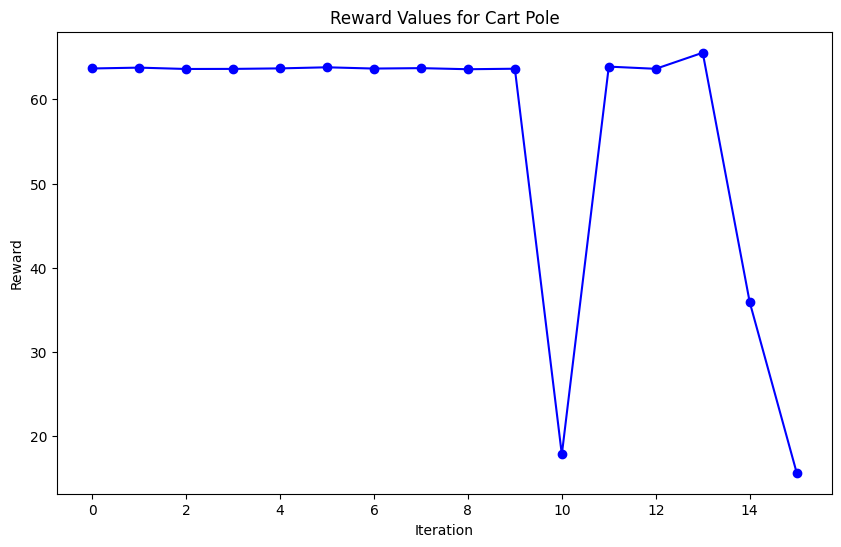

In [9]:
import matplotlib.pyplot as plt
reward_values = rl.get_metric_results()
print(reward_values)
plt.figure(figsize=(10, 6))
plt.plot(reward_values.values(), marker='o', color='b', linestyle='-', markersize=6)

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Reward')
plt.title('Reward Values for Cart Pole')